### Nifti pixel Spacing analysis

In [17]:
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
dir_path='..PATH...' #path in masvol where original labels were present
patients = os.listdir(dir_path)

In [47]:
dic_patient={}
for s in patients:
    label_dir=dir_path+s+'/labels/'
    image_name=label_dir+os.listdir(label_dir)[0]
    image=sitk.ReadImage(image_name)
    dic_patient[s]=image.GetSpacing()[0]
    #print(str(image.GetSpacing()[0])+'  '+str(image.GetSpacing()[1]))

In [14]:
df=pd.DataFrame(list(dic_patient.items()), columns=['Patient', 'pixel_spacing'])

In [23]:
df.head(10)

,Patient,pixel_spacing
0,patient001,1.562500
1,patient002,1.367188
2,patient003,1.562500
3,patient004,1.367188
4,patient005,1.406250
5,patient006,1.757812
6,patient007,1.875000
7,patient008,1.562500
8,patient009,1.367190
9,patient010,1.562500


In [27]:
df['pixel_spacing']=df['pixel_spacing'].apply(pd.to_numeric, errors='coerce')

In [29]:
df.dtypes

Patient           object
pixel_spacing    float64
dtype: object

In [38]:
df.pixel_spacing.unique()


array([ 1.5625    ,  1.3671875 ,  1.40625   ,  1.7578125 ,  1.875     ,
        1.36719   ,  1.48438001,  1.44531   ,  1.75781   ,  1.6796875 ,
        1.4453125 ,  1.484375  ,  1.67969   ,  0.83333302,  1.64061999,
        1.78570998,  1.91963995,  0.703125  ,  1.640625  ,  1.65179002,
        1.21528006,  1.45833004,  1.68269002,  1.25      ,  1.31579006])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000085C12B0>]], dtype=object)

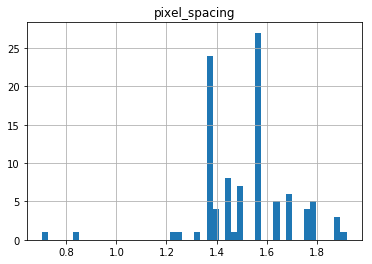

In [40]:
df.hist(column='pixel_spacing',bins=50)

In [43]:
df.groupby(['pixel_spacing']).size()

pixel_spacing
0.703125     1
0.833333     1
1.215280     1
1.250000     1
1.315790     1
1.367188    14
1.367190    10
1.406250     4
1.445310     5
1.445312     3
1.458330     1
1.484375     1
1.484380     6
1.562500    27
1.640620     2
1.640625     1
1.651790     2
1.679688     1
1.679690     2
1.682690     3
1.757810     2
1.757812     2
1.785710     5
1.875000     3
1.919640     1
dtype: int64